In [4]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pandas as pd
import tensorflow as tf
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [5]:
def VGGupdated(input_tensor=None, classes=7):
    img_rows, img_cols = 48, 48  # by default size is 224,224
    img_channels = 1

    img_dim = (img_rows, img_cols, img_channels)

    img_input = Input(shape=img_dim)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    # Create model.

    model = Model(inputs=img_input, outputs=x, name='VGGdemo')

    return model

In [6]:
from keras import metrics
model = VGGupdated(classes = 7)
opt = tf.keras.optimizers.Adam(0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',metrics.Precision(), metrics.Recall()])


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
train_df = pd.read_csv('/content/drive/MyDrive/Dataset/train.csv', engine='python',error_bad_lines=False)

In [11]:
train_df.head(10)

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...
9,2,255 254 255 254 254 179 122 107 95 124 149 150...


In [12]:
# check how many samples for each category are present
print("Total number of images in the dataset: ", len(train_df))

Total number of images in the dataset:  28709


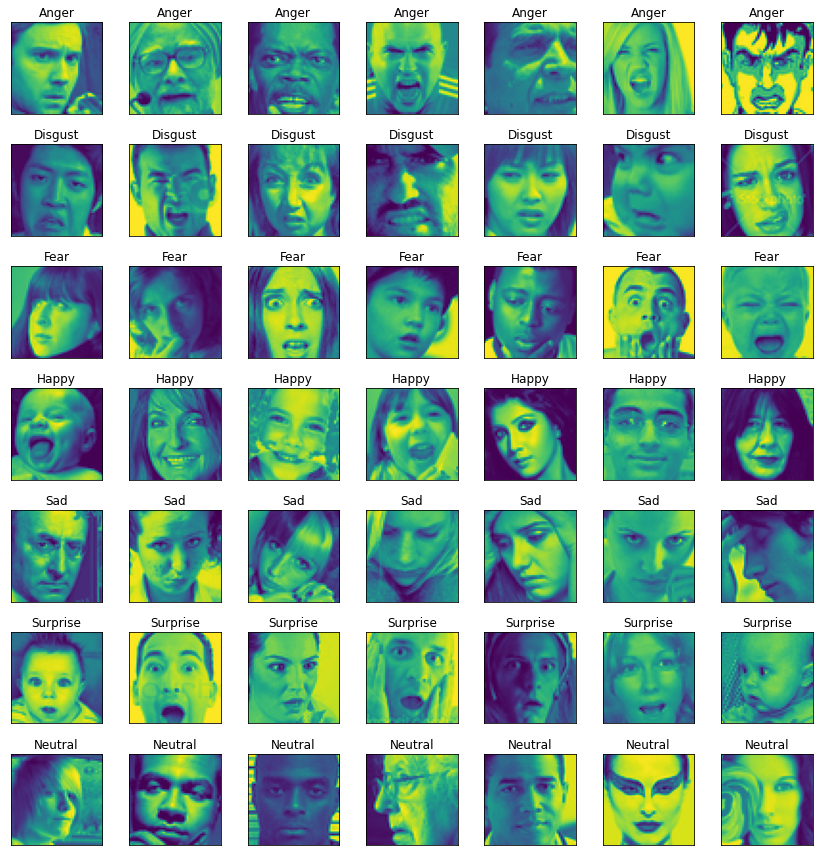

In [13]:
import matplotlib.pyplot as plt
emotion_label = {0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
fig = plt.figure(1, (12,12))
k=0

for label in sorted(train_df.emotion.unique()):
    for j in range(7):
        px = train_df[train_df.emotion==label].pixels.iloc[k]
        #converting images into array
        px = np.array(px.split(' ')).reshape(48,48).astype('float32')
        
        k += 1
        ax = plt.subplot(7,7,k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label[label])
        plt.tight_layout()

In [14]:
train_df['pixels'] = [np.fromstring(x, dtype=int, sep=' ').reshape(-1,48,48,1) for x in train_df['pixels']]
img_array = np.concatenate(train_df.pixels)
le = LabelEncoder()
img_labels = le.fit_transform(train_df.emotion)
img_labels = np_utils.to_categorical(img_labels)

X_train, X_test, y_train, y_test = train_test_split(img_array, img_labels, test_size=0.2, random_state=1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(22967, 48, 48, 1) (22967, 7) (5742, 48, 48, 1) (5742, 7)


In [15]:
h1=model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/5
 22/718 [..............................] - ETA: 1:05:15 - loss: 1.9028 - accuracy: 0.1960 - precision: 0.0000e+00 - recall: 0.0000e+00

KeyboardInterrupt: ignored

In [ ]:
# plot accuracy of training and evaluation data
plt.plot(h1.history['accuracy'], label='accuracy')
plt.plot(h1.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2,1])
plt.legend(loc="upper right")
plt.show()

In [ ]:
# plot loss of training and evaluation data
plt.plot(h1.history['loss'], label='loss')
plt.plot(h1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([1,2])
plt.legend(loc="upper right")
plt.show()

In [ ]:
# evaluate the model on test data
preds = model.evaluate(X_test, y_test)
print("Loss= "+ str(preds[0]))
print("Test Accuracy= "+ str(preds[1]))
print("Test Precision= "+ str(preds[2]))
print("Test Recall= "+ str(preds[3]))

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from keras_preprocessing import image
#img_path = '/content/t.jpg'
#img = image.load_img(img_path, target_size=(48, 48))
import cv2
my_image=cv2.imread('/content/t.jpg')
# convert image into gray scale image
gray_image=cv2.cvtColor(my_image, cv2.COLOR_BGR2GRAY)
x = image.img_to_array(gray_image)
x = np.expand_dims(x, axis=0)
print('Input image shape:', x.shape)
imshow(gray_image)

In [ ]:
print(model.predict(x))